# Imports

In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Visualise

In [2]:
def plot_classes(X, y):
    y = y.reshape(-1)
    class_0 = X[y == 0]
    class_1 = X[y == 1]

    plt.figure(figsize=(8, 6))
    plt.scatter(class_0[:, 0], class_0[:, 1], c='orange', marker='o', label='Class 0')
    plt.scatter(class_1[:, 0], class_1[:, 1], c='blue', marker='s', label='Class 1')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Class Distribution")
    plt.legend()
    plt.grid(True)
    plt.show()


## 🎓 Part 1: Linear SVM and Logistic Regression

### 🧩 Your Task
In this section, you will work with **`data1.mat`**, a dataset that is *(mostly)* linearly separable.  
Your goal is to explore how the **regularization parameter `C`** affects the decision boundary of a **Support Vector Machine (SVM)** with a **linear kernel**.

---

### ⚙️ Understanding the `C` Parameter
The **`C`** parameter controls the trade-off between achieving a **large margin** and **minimizing classification errors** on the training data:

- **Small `C` → Soft Margin Classifier**  
  Allows more misclassifications in favor of a **wider, more generalizable margin**.

- **Large `C` → Hard Margin Classifier**  
  Heavily penalizes misclassifications, which can lead to a **narrower margin** and potential **overfitting**.

---

### 🧠 What You’ll Do
You will train several **SVM models** with different `C` values and compare their:
- Decision boundaries  
- Accuracies  
to those of a **Logistic Regression** model.

---

### 📝 Instructions
1. Complete the code in the loop that iterates through `C_values`.
2. For each `C`:
   - Initialize `svm.SVC` with a `'linear'` kernel.  
   - Train (`fit`) the SVM model using the data `X` and `y`.  
   - Generate predictions with the trained model.  
   - Calculate the `accuracy_score` for the predictions.
3. After the loop:
   - Initialize, train, and evaluate a `LogisticRegression` model.
4. Observe the resulting plots:
   - **Decision boundary** → the black line.  
   - **Support vectors** → the circled points.  
   - Note how these change as `C` increases.

###  Output Example

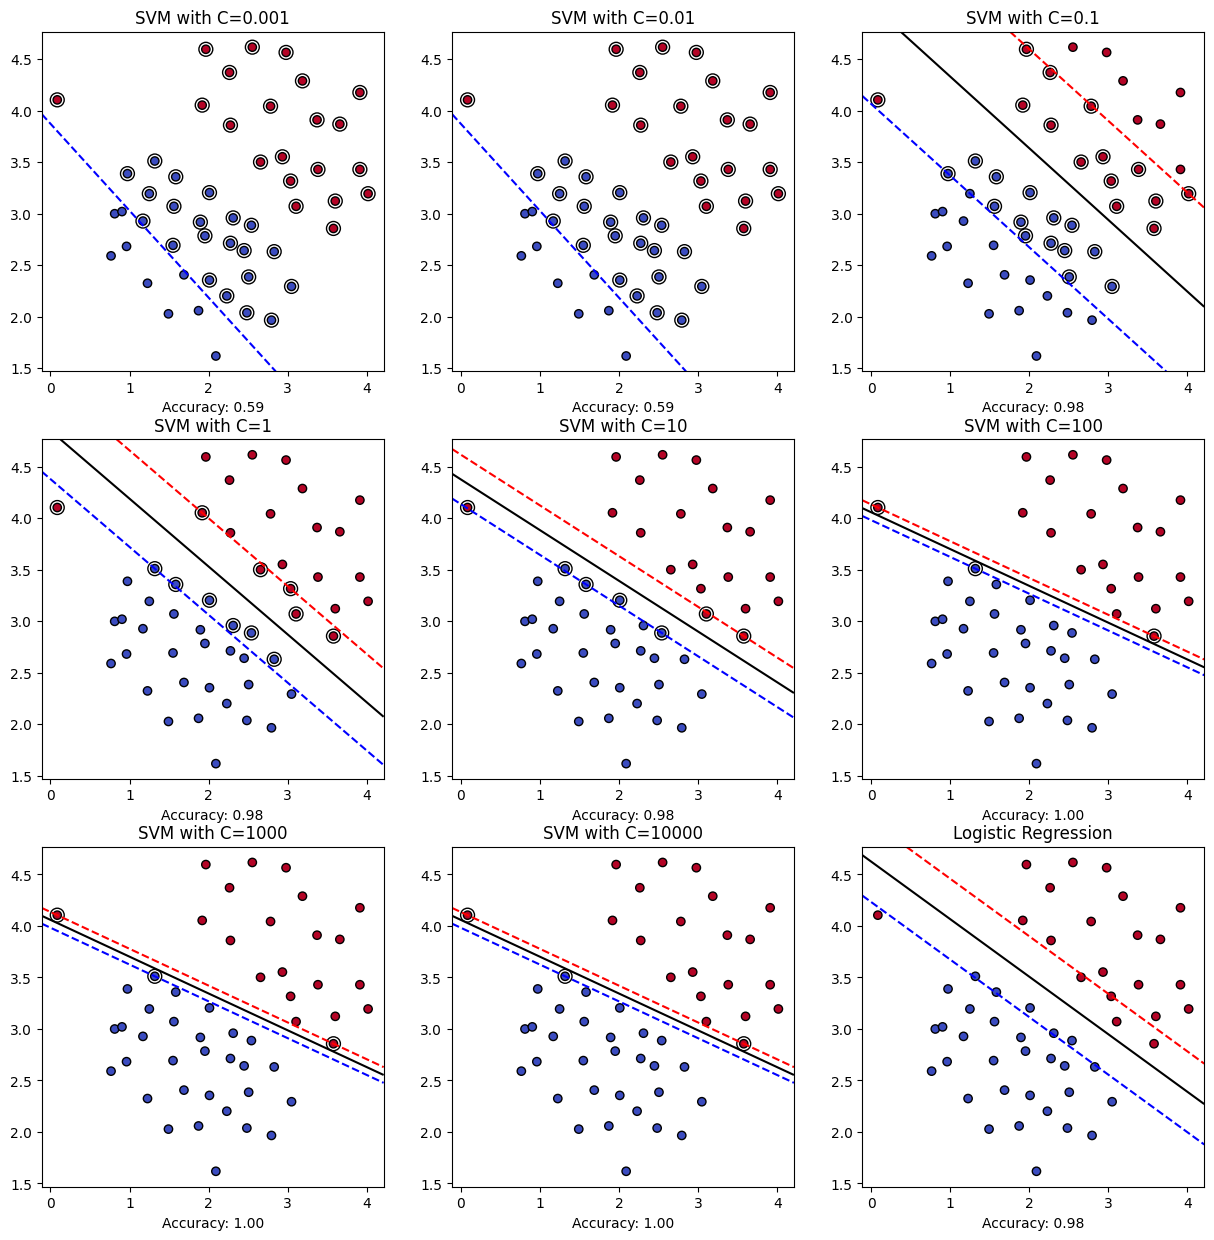

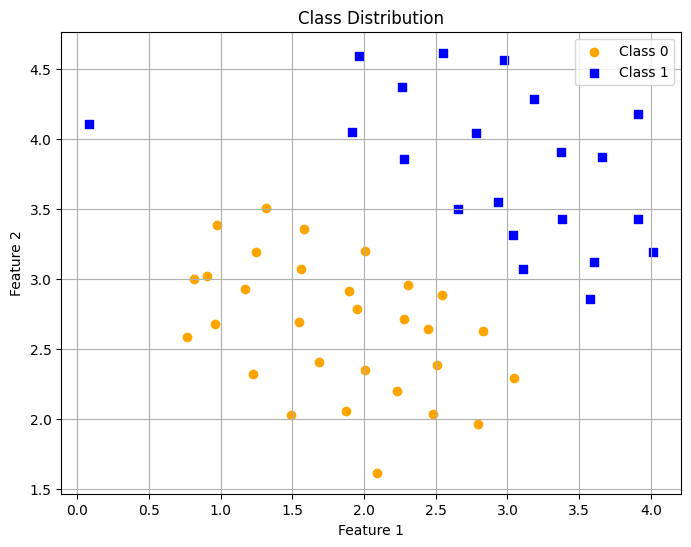

In [3]:
# mat=loadmat('./data1.mat')
mat=loadmat('Dataset/data1.mat')
X=mat['X']
y=mat['y'].astype(int)
plot_classes(X,y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset from a .mat file
# Note: You might need to adjust the path 'Dataset/data1.mat'
try:
    mat = loadmat('Dataset/data1.mat')  # Load the MATLAB .mat file
except FileNotFoundError:
    print("Error: 'Dataset/data1.mat' not found.")
    print("Please ensure the file path is correct.")

X = mat['X']  # Extract features from the dataset
y = mat['y'].ravel()  # Extract target variable, flattening to a 1D array

# Function to visualize decision boundaries 
    # Scatter plot of the data points
    
    # Get axis limits

    # Create a mesh grid
    
    # Compute the decision function

    # Plot the decision boundary and margins
    # levels=[-1, 0, 1] plots the margin lines and the boundary
    
    # Highlight support vectors (if the classifier has them)


# --- START YOUR CODE HERE ---

# List of regularization parameter values for SVM
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# Create a 3x3 grid of subplots

# --- SVM Loop ---
print("Training SVM models...")
# 1. Train and visualize SVM for each value of C
for i, C in enumerate(C_values):
    
    # 1a. Create an SVM classifier with a linear kernel and the current C
    # Hint: Use svm.SVC() and set the 'kernel' and 'C' parameters
    clf_svm = svm.SVC(kernel=____, C=____)  
    
    # 1b. Fit the SVM to the data (X, y)
    # Hint: Use the .fit() method
    
    # 1c. Visualize the decision boundary
    
    # 1d. Get predictions from the SVM model on the training data X
    # Hint: Use the .predict() method
    
    # 1e. Calculate the accuracy and set the label
    # Hint: Use accuracy_score() from sklearn.metrics

# --- Logistic Regression ---
print("Training Logistic Regression model...")
# 2. Train and visualize logistic regression in the last subplot (axes[8])

# 2a. Create a logistic regression classifier
# Hint: Use LogisticRegression()

# 2b. Fit the logistic regression model to the data

# 2c. Visualize the decision boundary

# 2d. Get predictions from the logistic regression model

# 2e. Calculate the accuracy and set the label

# --- END YOUR CODE HERE ---

# Adjust layout and save/show the plot
print("Saving plot to 'decision_boundaries.png' and displaying.")
plt.savefig('decision_boundaries.png', dpi=300)
plt.show()

## 🎓 Part 2: Non-Linear SVM with Kernels

### 🧩 Your Task
Welcome to **Part 2**! You will work with **`data2.mat`**, a dataset that is **not linearly separable**. This is where SVM **kernels** become useful — a linear kernel will struggle, so you’ll explore more expressive kernels to capture the non-linear structure.

You will experiment with three SVM kernels:

- **Linear kernel** (`kernel='linear'`) — baseline to show how a linear classifier struggles on this data.  
- **Polynomial kernel** (`kernel='poly'`) — can form curved decision boundaries; test different `degree` values to change complexity.  
- **Gaussian / RBF kernel** (`kernel='rbf'`) — maps samples into a high-dimensional space; very powerful and sensitive to the `gamma` hyperparameter (controls the influence of single training points).

---

### ⚙️ What to try
You should run experiments that vary relevant hyperparameters and compare results:

- **Linear:** vary `C` to see soft vs hard margin performance.
- **Polynomial:** nested loops over `degree` (e.g. 2, 3, 4) and `C` values.
- **RBF:** nested loops over `gamma` (e.g. `0.01, 0.1, 1, 10`) and `C` values.

Record both **decision boundary plots** and **accuracy** for each configuration.

---

### 📝 Instructions (step-by-step)
1. **Linear kernel loop**
   - For each `C` in your `C_values`:
     - Initialize `svm.SVC(kernel='linear', C=C)`.
     - Fit the model on `X` and `y`.
     - Predict on the grid (for plotting) and on the training/test set (for accuracy).
     - Save accuracy and save the boundary plot.

2. **Polynomial kernel loop (nested)**
   - For each `degree` in `degrees`:
     - For each `C` in `C_values`:
       - Initialize `svm.SVC(kernel='poly', degree=degree, C=C)`.
       - Fit, predict, compute accuracy, and save plot.

3. **RBF kernel loop (nested)**
   - For each `gamma` in `gamma_values`:
     - For each `C` in `C_values`:
       - Initialize `svm.SVC(kernel='rbf', gamma=gamma, C=C)`.
       - Fit, predict, compute accuracy, and save plot.

4. **Analyze results**
   - Open `Part 2.png` (or the saved figure collection).
   - Compare decision boundaries and accuracies.
   - Decide which **kernel + hyperparameter** combination gives the best fit (visually) and the **highest accuracy**.

---

### 📊 Suggested outputs to record
- A table of results with columns: `kernel`, `degree` / `gamma` (where applicable), `C`, `accuracy`, `notes (overfitting/underfitting)`.
- Side-by-side plots of decision boundaries for the best configurations of each kernel.
- Final answer: **Which kernel + hyperparameters** produced the best fit and highest accuracy? Explain briefly why (e.g., “RBF with `gamma=0.1`, `C=10` — captures local structure without overfitting”).

---

### 💡 Tips
- Use a mesh grid (e.g., `np.meshgrid`) to plot decision boundaries and color regions.
- Save each plot file with informative names (e.g., `svm_rbf_gamma0.1_C10.png`) so you can inspect them later.
- Watch for overfitting: extremely high `degree` (poly) or too large `C` can perfectly separate training points but generalize poorly.
- For reproducibility, set `random_state` where relevant.

---

###  Output Example

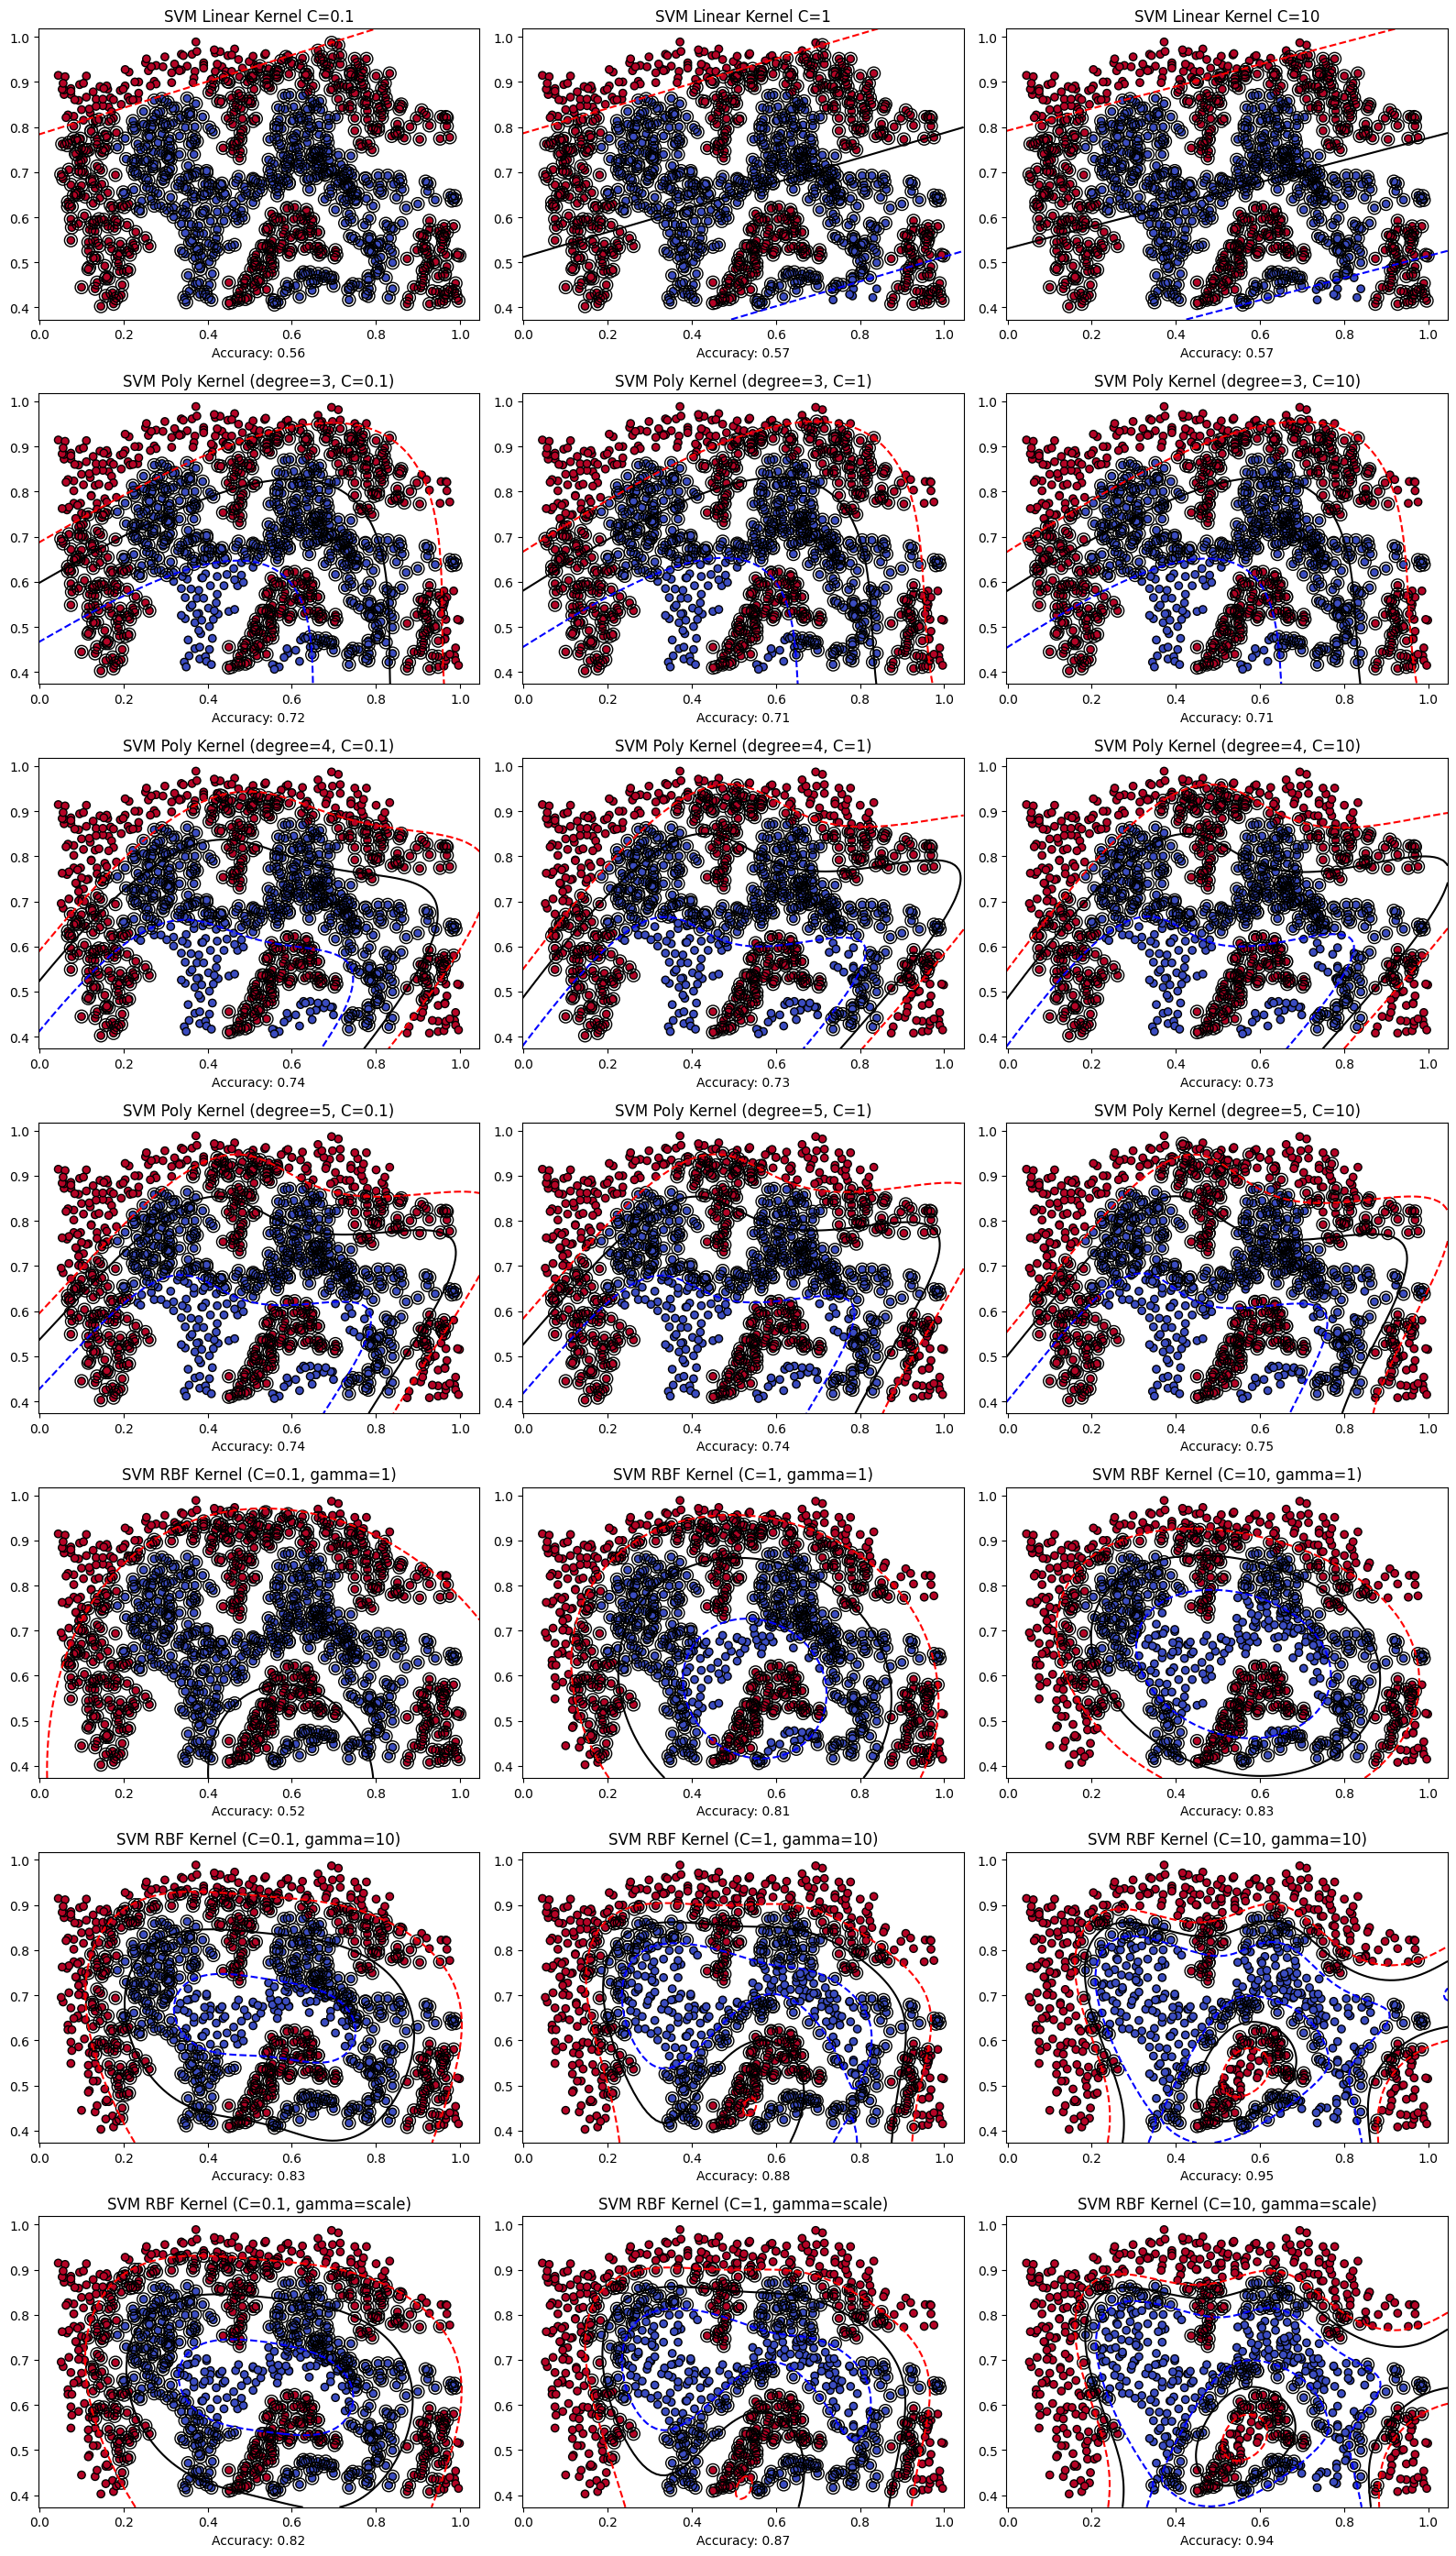

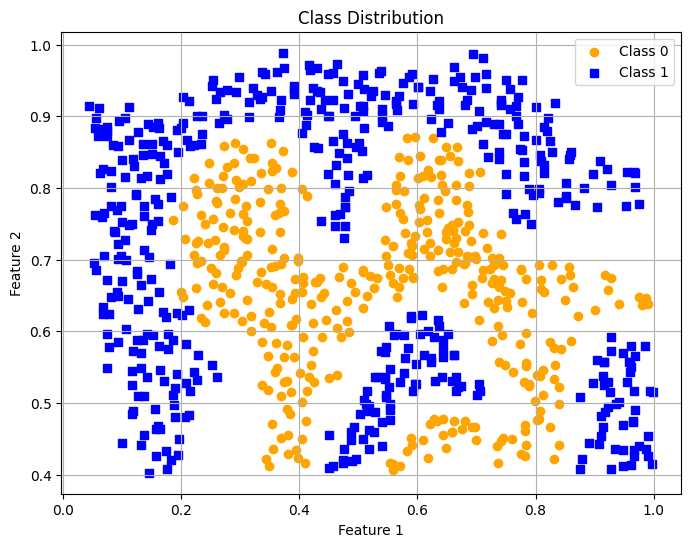

In [ ]:
# mat=loadmat('./data2.mat')
mat=loadmat('Dataset/data2.mat')

X=mat['X']
y=mat['y'].astype(int)
plot_classes(X,y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load the dataset from a .mat file
# Note: You might need to adjust the path 'Dataset/data2.mat'
try:
    mat = loadmat('Dataset/data2.mat')  # Load the MATLAB .mat file
except FileNotFoundError:
    print("Error: 'Dataset/data2.mat' not found.")
    print("Please ensure the file path is correct.")

X = mat['X']  # Extract features from the dataset
y = mat['y'].ravel()  # Extract target variable, flattening to a 1D array

# Function to plot decision boundaries (Provided)
def plot_decision_boundary(ax, clf, X, y, title):


# --- START YOUR CODE HERE ---

# Hyperparameters to test
C_values = [0.1, 1, 10]
degrees = [3, 4, 5]  # Degrees for polynomial kernel
gamma_values = [1, 10, 'scale']  # Possible gamma values for RBF kernel

# Setup plot grid 


# --- 1. Train SVM with Linear Kernel ---
print("Training Linear Kernel SVMs...")
for i, C in enumerate(C_values):
    
    # 1a. Create SVM classifier with a linear kernel and current C
    # Hint: Use svm.SVC() and set 'kernel' and 'C'
    
    # 1b. Fit the SVM to the data
    
    # 1c. Plot decision boundary
    
    # 1d. Get predictions
    
    # 1e. Calculate accuracy and set label
    # Hint: Use accuracy_score()

# --- 2. Train SVM with Polynomial Kernel ---
print("Training Polynomial Kernel SVMs...")
for j, degree in enumerate(degrees):
    for k, C in enumerate(C_values):
        idx = len(C_values) + j * len(C_values) + k  # Subplot index
        
        # 2a. Create SVM classifier with a polynomial kernel, current degree, and current C
        # Hint: Use svm.SVC() and set 'kernel', 'degree', and 'C'
        
        # 2b. Fit the SVM to the data
        
        # 2c. Plot decision boundary
        
        # 2d. Get predictions
        
        # 2e. Calculate accuracy and set label

# --- 3. Train SVM with Gaussian (RBF) Kernel ---
print("Training RBF Kernel SVMs...")
for l, gamma in enumerate(gamma_values):
    for m, C in enumerate(C_values):
        idx = len(C_values) + len(degrees) * len(C_values) + l * len(C_values) + m  # Subplot index
        
        # 3a. Create SVM classifier with an RBF kernel, current gamma, and current C
        # Hint: Use svm.SVC() and set 'kernel', 'gamma', and 'C'
        
        # 3b. Fit the SVM to the data
        
        # 3c. Plot decision boundary
        
        # 3d. Get predictions
        
        # 3e. Calculate accuracy and set label

# --- END YOUR CODE HERE ---


# Adjust layout and save/show the plot
print("Saving plot to 'Part 2.png' and displaying.")
plt.tight_layout()
plt.savefig('Part 2.png', dpi=300)
plt.show()

## 🎓 Part 3: Hyperparameter Tuning with a Validation Set

### 🧩 Your Task
In **Parts 1 and 2**, you calculated accuracy on the **training data**—the same data used to train the model.  
This can be misleading, as a model might just be **memorizing** the training data (**overfitting**) and may not perform well on new, unseen data.

In this part, you are given **`data3.mat`**, which is split into two sets:

- **Training Set** (`X`, `y`) → Used to train the model  
- **Validation Set** (`Xval`, `yval`) → Used to evaluate the model’s performance and select the **best hyperparameters**  

Your goal is to perform a **grid search** to find the optimal hyperparameters for **RBF** and **Polynomial** kernels.  
Train the model on `(X, y)` and test its accuracy on `(Xval, yval)`.

---

### ⚙️ RBF Kernel Loop
For each combination of `C` and `gamma`:

1. Initialize `svm.SVC(kernel='rbf', C=C, gamma=gamma)`.
2. Fit the model on the **training data** `(X, y)`.
3. Predict on the **validation data** `Xval`.
4. Calculate `accuracy_score` comparing predictions to `yval`.
5. Track the combination of `C` and `gamma` that gives the **highest validation accuracy**.

---

### ⚙️ Polynomial Kernel Loop
For each combination of `C` and `degree`:

1. Initialize `svm.SVC(kernel='poly', C=C, degree=degree)`.
2. Fit on `(X, y)`.
3. Predict on `(Xval)`.
4. Calculate `accuracy_score` against `yval`.
5. Track the combination of `C` and `degree` that gives the **highest validation accuracy** (`best_accuracy_poly`).

---

### 📝 Analysis
- Examine the **final plots** and **printed output**.  
- Identify the **optimal hyperparameters** for each kernel (RBF and Polynomial).  
- Compare their validation accuracies and comment on which kernel performed better.  

---

### 💡 Tips
- Use **nested loops** for grid search over all hyperparameter combinations.
- Keep track of the **best score and parameters** using simple `if` conditions.  
- This simulates **model selection** on unseen data and helps avoid overfitting.

###  Output Example

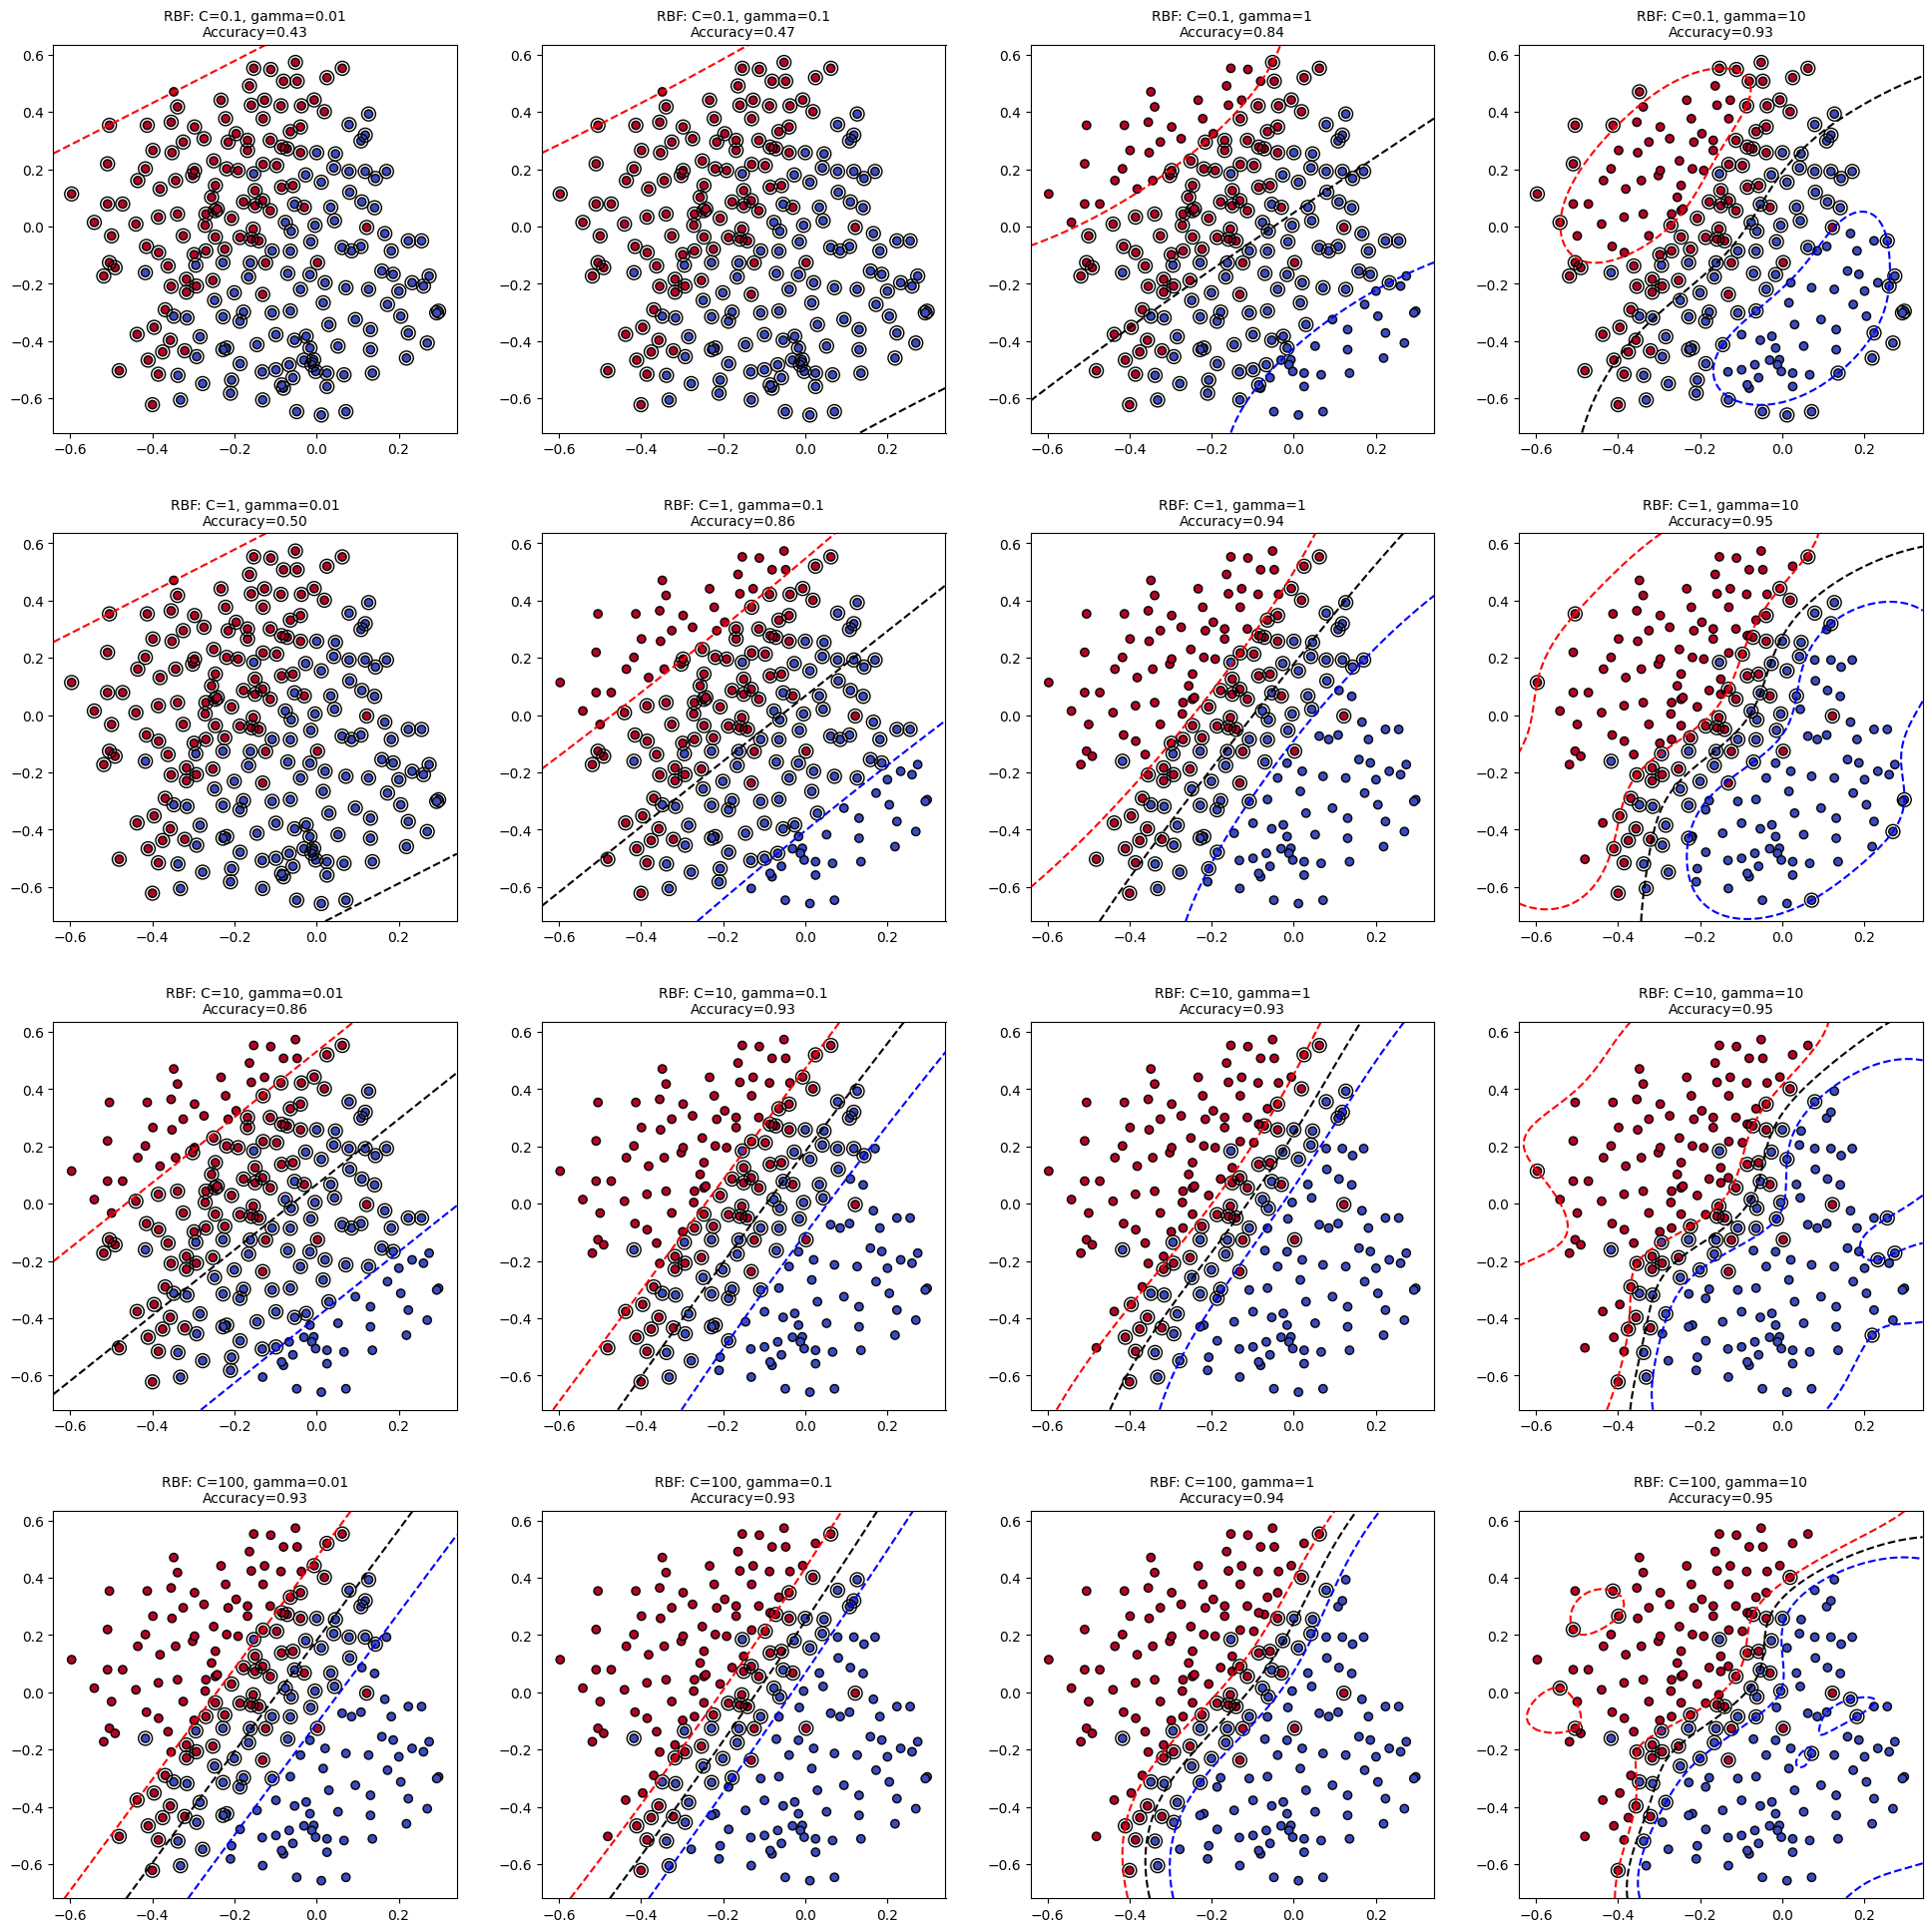
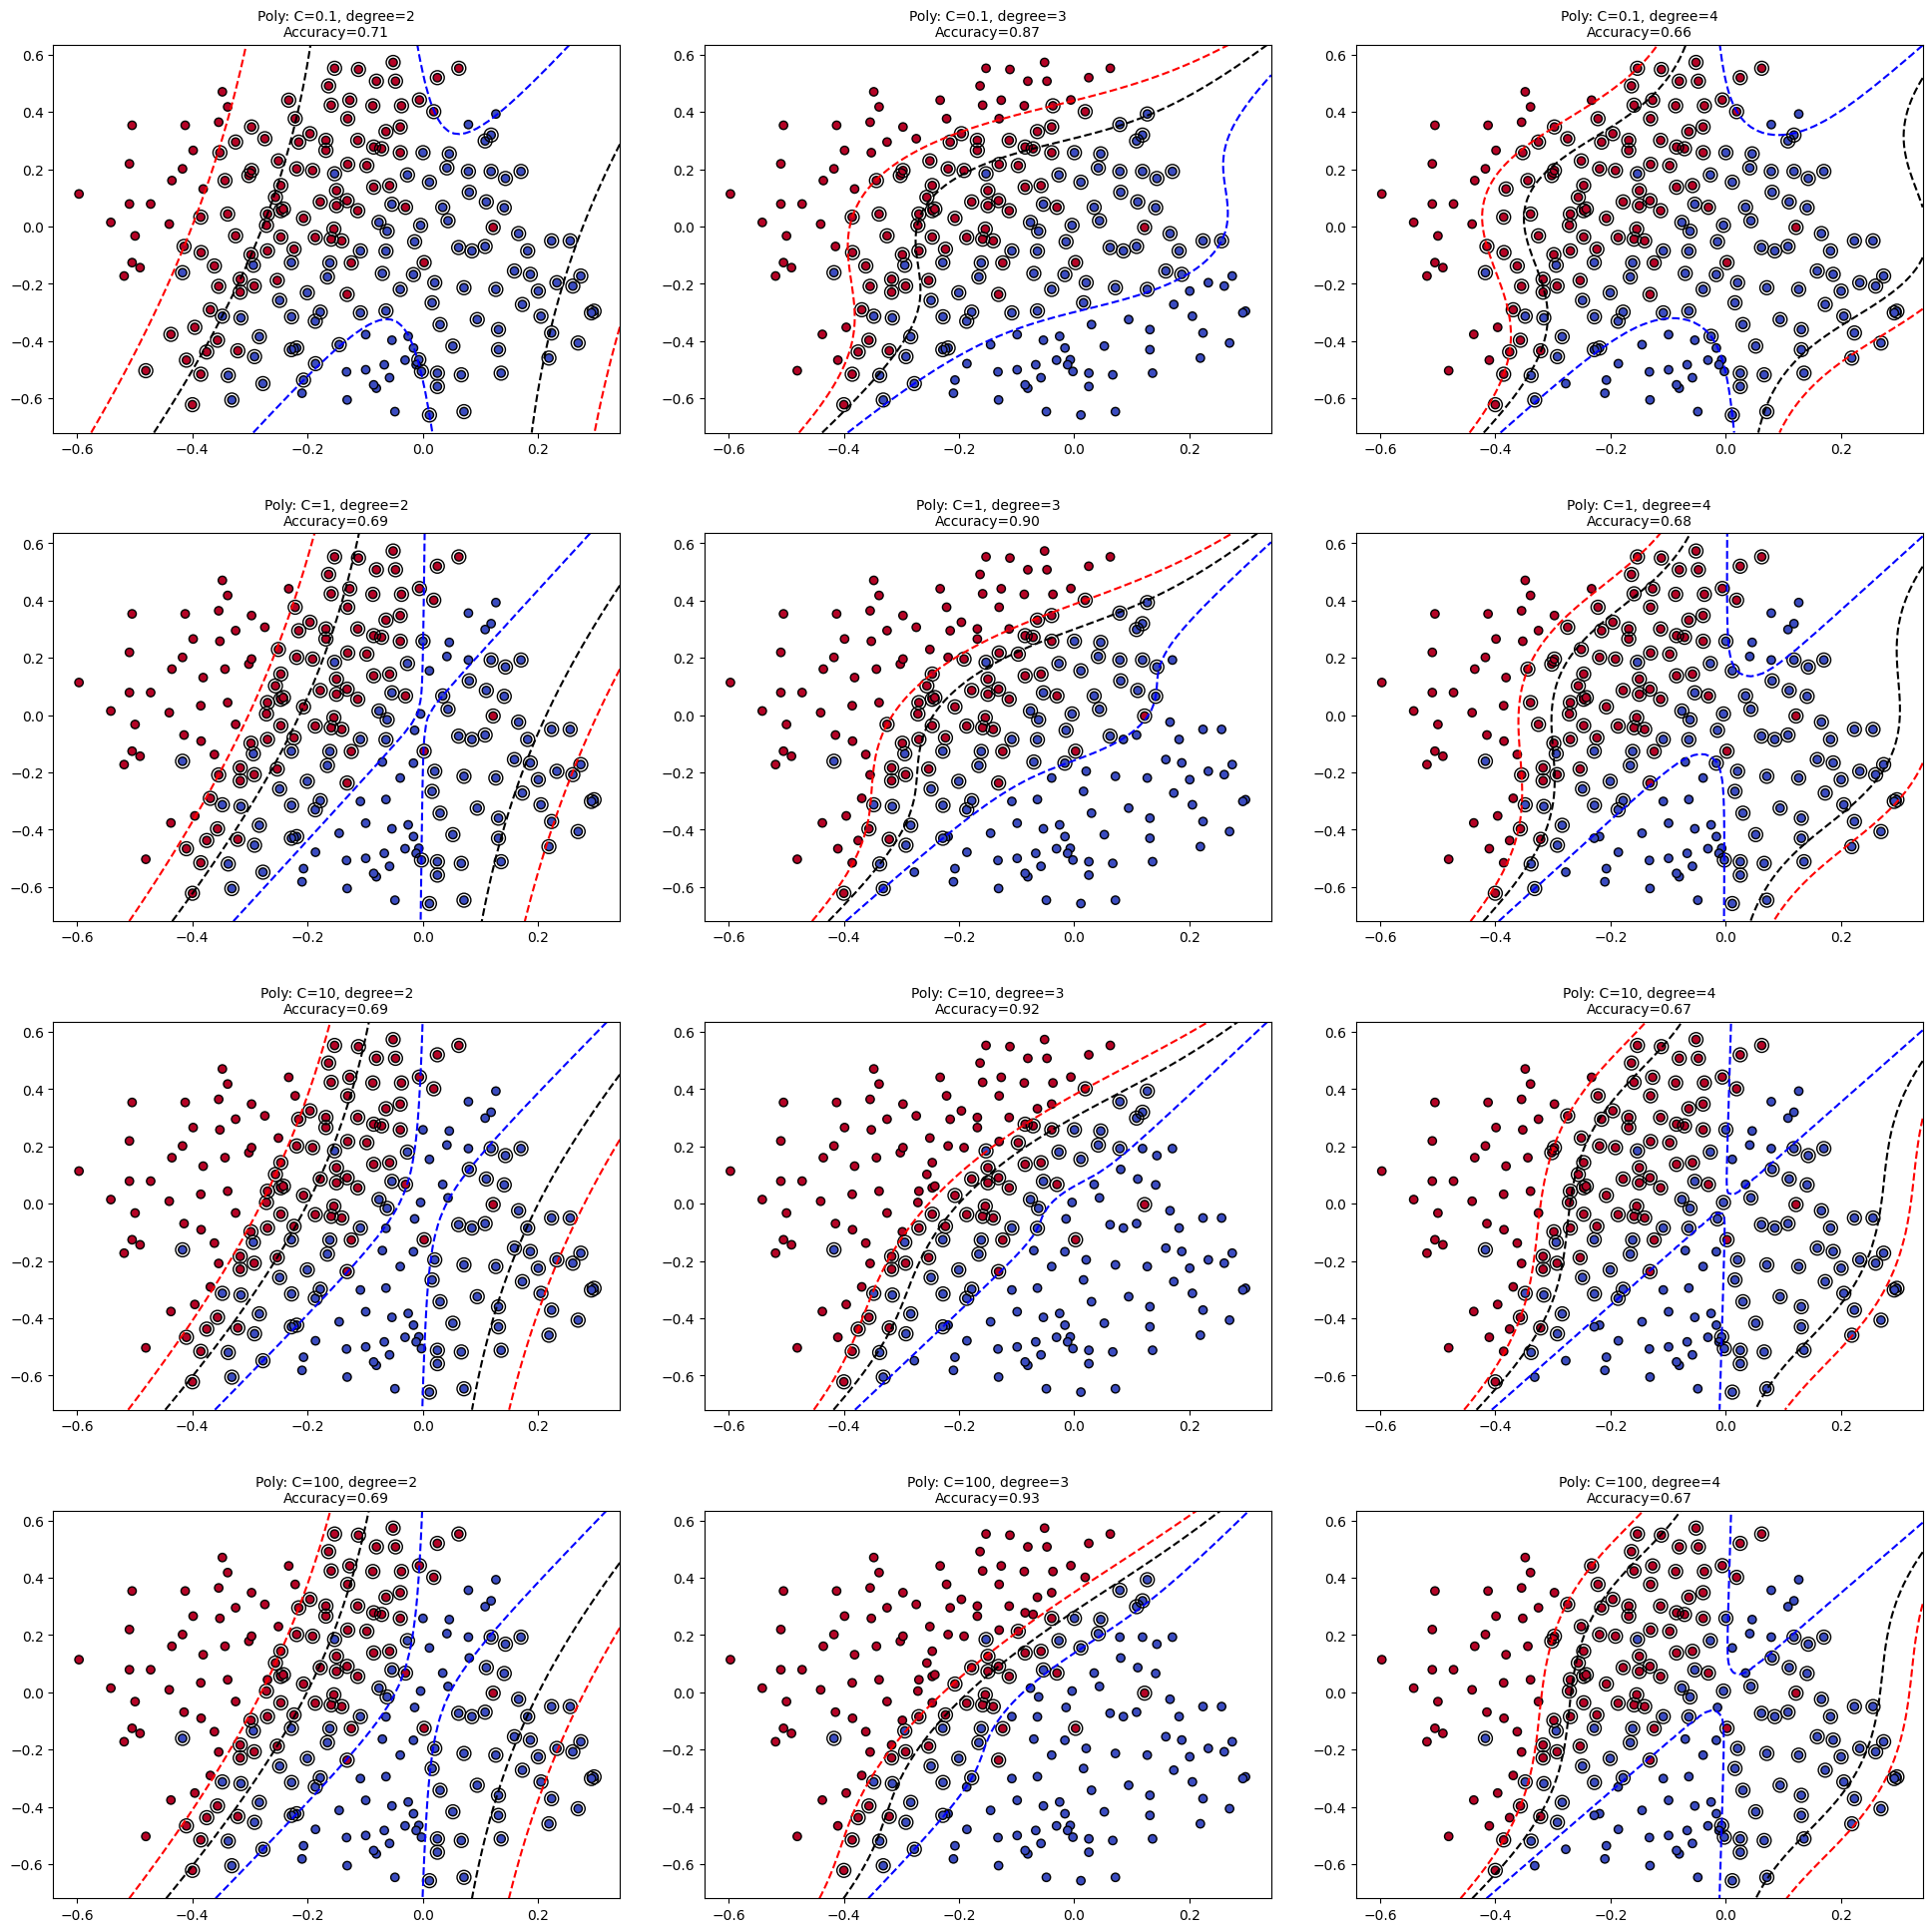

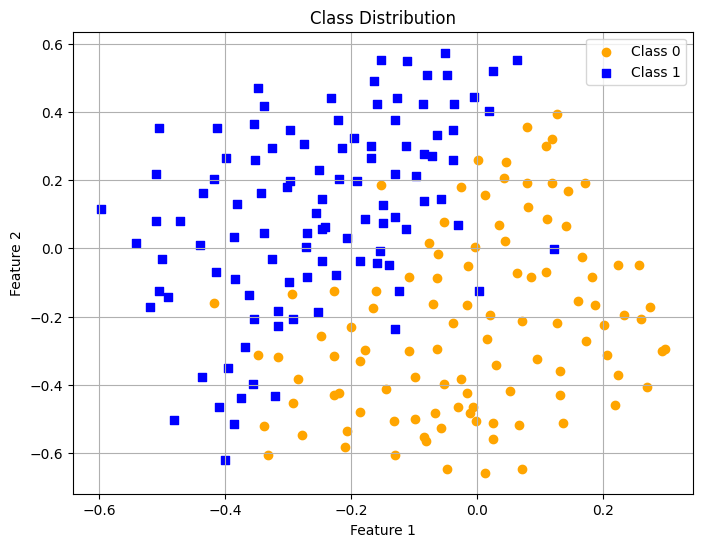

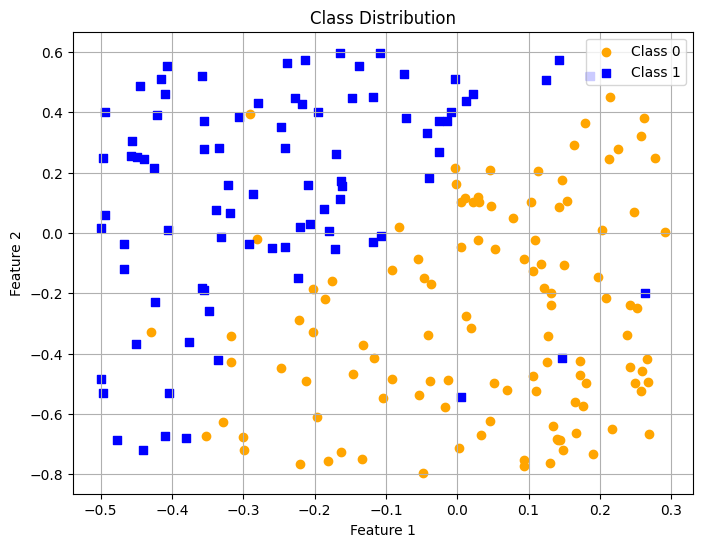

In [6]:
# mat=loadmat('./data3.mat')
mat=loadmat('Dataset/data3.mat')

X=mat['X']
y=mat['y'].astype(int)

Xval=mat['Xval']
yval=mat['yval'].astype(int)
plot_classes(X,y)
plot_classes(Xval,yval)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load the dataset
# Note: You might need to adjust the path 'Dataset/data3.mat'
try:
    mat = loadmat('Dataset/data3.mat')
except FileNotFoundError:
    print("Error: 'Dataset/data3.mat' not found.")
    print("Please ensure the file path is correct.")

    
X = mat['X']  # Training features
y = mat['y'].ravel()  # Training labels
Xval = mat['Xval']  # Validation features
yval = mat['yval'].ravel()  # Validation labels

# --- START YOUR CODE HERE ---

# Hyperparameter lists
C_values = [0.1, 1, 10, 100]
gamma_values = [0.01, 0.1, 1, 10]
degrees = [2, 3, 4]

# --- 1. RBF Kernel Tuning ---
print("Tuning RBF Kernel...")

# Plot setup 


# Variables to track the best RBF model
best_accuracy = 0
best_C = None
best_gamma = None

plot_index = 0
for C in C_values:
    for gamma in gamma_values:
        
        # 1a. Create SVM with RBF kernel, current C, and current gamma
        # Hint: Use svm.SVC()
        clf = svm.SVC(kernel=____, C=____, gamma=____)  
        
        # 1b. Fit the model to the *training data*
        # Hint: Use .fit() with X and y
        ____.____(____, ____)  
        
        # 1c. Make predictions on the *validation data*
        # Hint: Use .predict() with Xval
        yval_pred = clf.____(____)  
        
        # 1d. Calculate accuracy on the *validation set*
        # Hint: Use accuracy_score() with yval and yval_pred
        accuracy = ____(____, ____)  
        
        print(f"RBF - C: {C}, gamma: {gamma}, Validation Accuracy: {accuracy:.2f}")
        
        # Plotting 


        # 1e. Update best parameters if this model is better
        # Hint: Compare 'accuracy' with 'best_accuracy'
        if ____ > ____:
            best_accuracy = ____
            best_C = ____
            best_gamma = ____

print(f"\nBest Parameters (RBF): C = {best_C}, gamma = {best_gamma}, Best Validation Accuracy = {best_accuracy:.2f}")

# Save and show RBF plot
plt.tight_layout(pad=3.0)
plt.savefig('RBF_Kernel_Plots.png', dpi=300)
plt.show()
plt.clf()

# --- 2. Polynomial Kernel Tuning ---
print("\nTuning Polynomial Kernel...")

# Plot setup (Provided)


# Variables to track the best Polynomial model
best_accuracy_poly = 0
best_C_poly = None
best_degree = None

for C in C_values:
    for degree in degrees:
        
        # 2a. Create SVM with Polynomial kernel, current C, and current degree
        clf_poly = svm.SVC(kernel=____, C=____, degree=____)  
        
        # 2b. Fit the model to the *training data*
        
        # 2c. Make predictions on the *validation data*
        
        # 2d. Calculate accuracy on the *validation set*
        
        # Plotting 

        # 2e. Update best parameters if this model is better
        if ____ > ____:
            best_accuracy_poly = ____
            best_C_poly = ____
            best_degree = ____

print(f"\nBest Parameters (Polynomial): C = {best_C_poly}, degree = {best_degree}, Best Validation Accuracy = {best_accuracy_poly:.2f}")

# Save and show Polynomial plot
plt.tight_layout(pad=3.0)
plt.savefig('Polynomial_Kernel_Plots.png', dpi=300)
plt.show()

# --- END YOUR CODE HERE ---